# NYC New Measles Cases by Month (2018-2019)

- This Jupyter/Python notebook creates a bar chart of the 2018-2019 NYC New Measles Cases by Month and saves it as a PNG image.
- This notebook is part of the "measles" GitHub project: https://github.com/carlos-afonso/measles
- Author: Carlos Afonso: https://carlos-afonso.github.io
- Date: July 17, 2019

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the data as a dataframe
data_file = '../data/nyc_health_new_measles_cases_by_month.csv'
df = pd.read_csv(data_file)
df

,Start Date,End Date,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Total
0,2018-09-01,2019-05-20,1,14,28,14,34,68,150,169,45,0,0,523
1,2018-09-01,2019-05-24,1,14,28,14,34,68,151,171,54,0,0,535
2,2018-09-01,2019-05-29,1,14,28,14,34,69,157,173,60,0,0,550
3,2018-09-01,2019-06-03,1,14,28,14,34,69,159,172,73,2,0,566
4,2018-09-01,2019-06-10,1,14,28,14,34,69,160,177,86,5,0,588
5,2018-09-01,2019-07-15,1,14,28,14,35,72,166,177,93,22,1,623


In [3]:
# Get the start date and transform it into a nicely formatted string
start_date_obj = datetime.strptime(df.values[-1, 0], '%Y-%m-%d').date()
start_date_str = start_date_obj.strftime('%b %d, %Y').replace(' 0', ' ')
start_date_str

'Sep 1, 2018'

In [4]:
# Get the end date and transform it into a nicely formatted string
end_date_obj = datetime.strptime(df.values[-1, 1], '%Y-%m-%d').date()
end_date_str = end_date_obj.strftime('%b %d, %Y').replace(' 0', ' ')
end_date_str

'Jul 15, 2019'

In [5]:
# Get the values to plot (we want the lastest values, which are in the last row)
vals = list(df.values[-1, 2:-1])
vals

[1, 14, 28, 14, 35, 72, 166, 177, 93, 22, 1]

In [6]:
# Get the labesl corresponding to the values above
labels = list(df.columns[2:-1])

first_label = labels[0].replace(' ', '\n')
last_label = labels[-1].replace(' ', '\n')

def f(s):
    if s[0:3] == 'Jan': 
        return s.replace(' ', '\n')
    else:
        return s[0:3]
    
middle_labels = list(map(f, labels[1:-1]))

labels = [first_label] + middle_labels + [last_label]

labels

['Sep\n2018',
 'Oct',
 'Nov',
 'Dec',
 'Jan\n2019',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul\n2019']

In [7]:
# Get the number of total cases
total_cases = int(df.iloc[-1, -1])
total_cases

623

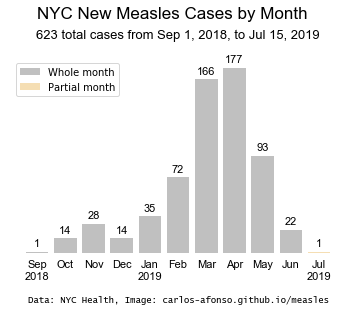

In [8]:
fn = 'Arial' # font name
fs = 11      # font size

fig = plt.figure()
fig.suptitle(
    'NYC New Measles Cases by Month', 
    fontname = fn, 
    fontsize = fs + 6
)

ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.8)
plt.title(
    str(total_cases) + ' total cases from ' + start_date_str + ', to ' + end_date_str + '\n', 
    fontname = fn, 
    fontsize = fs + 2
)

x_pos = range(len(vals))

# Create the bar chart
ax.bar(x_pos[0:-1], vals[0:-1], align = 'center', color = 'silver', label = 'Whole month')
ax.bar(x_pos[-1:], vals[-1:], align = 'center', color = 'wheat', label = 'Partial month')

ax.legend()

# Remove the y ticks (and labels)
ax.set_yticks([])

# Remove the x ticks
ax.xaxis.set_ticks_position('none')

# Set the x labels
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontname = fn, fontsize = fs)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Create the labels on top of the bars showing the number and percentage of cases
for i in ax.patches:
    ax.text(
        i.get_x() + 0.4, 
        i.get_height() + 5, 
        str(i.get_height()), 
        fontname = fn, 
        fontsize = fs, 
        horizontalalignment = 'center'
    )

# We don't need to an x-axis label, so we can use xlabel for an annotation about the Data/Image sources
plt.xlabel(
    '\nData: NYC Health, Image: carlos-afonso.github.io/measles', 
    fontname = 'Lucida Console', 
    fontsize = fs - 2
)

plt.show()

In [9]:
#fig.savefig('../images/nyc_new_measles_cases_by_month_barchart_py.png', bbox_inches = 'tight', dpi = 150)
fig.savefig('../images/nyc_new_measles_cases_by_month_barchart_py.svg', bbox_inches = 'tight')